In [9]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [10]:
def confusion_from_csv(csv, genre_type):
    import pandas as pd
    df = pd.read_csv(csv)
    
    #depending on genre_type, get cluster index and appropriate genre
    if genre_type == "lavin":
        genres = list(df["lavin_genres"])
    else:
        genres = list(df["big_genres"])
    
    clusters = [str(i) for i in list(df["labels"])]
     
    y_actu = pd.Series(genres, name='Human Coded')
    y_pred = pd.Series(clusters, name='Inferred')
    
    df_confusion = pd.crosstab(y_pred, y_actu)
    filename = csv.replace("lavin_results/", "").replace(".csv", "_confusion_"+genre_type)
    df_confusion.to_csv("viz/"+ filename +".csv")
import glob
csvs = glob.glob("lavin_results/*.csv")
for csv in csvs:
    if "horror" not in csv:
        confusion_from_csv(csv, genre_type="big")
for csv in csvs:
    confusion_from_csv(csv, genre_type="lavin")

In [36]:
import sqlite3

In [32]:
#get feature dicts from .p file
from application.pickles import pickledData

pData = pickledData()
_ids_dates_genres = pData.metadata
_ids = pData._ids
dates = pData.dates
genres = pData.genres
feature_dicts = pData.feature_dicts

from application.selective_features import make_feature_list, dictionaries_without_features, dictionaries_of_features

top_genre_terms = make_feature_list("lavin_lexicon/features_correlation_with_genre_all.csv", "spearman", 8500)
#print(top_genre_terms)
top_year_terms = make_feature_list("lavin_lexicon/features_correlation_with_pubdate_all.csv", "pearson", 500)
#print(top_year_terms)

#run dictionaries of features
new_feature_dicts = dictionaries_of_features(feature_dicts, top_genre_terms)
print("Done making feature list")

#run dictionaries without features
revised_feature_dicts = dictionaries_without_features(new_feature_dicts, top_year_terms)

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd

# create vectors using N top features not in stops
tfidf = TfidfTransformer()
vec = DictVectorizer()
vect = vec.fit_transform(revised_feature_dicts)
adjusted = tfidf.fit_transform(vect)
data = adjusted.toarray()
print(len(data[0]))


Loaded pickle data successfully.
Done making feature list
8040


In [33]:
def gs(a):
    pairs = {'crime':0, 'gothic':1, 'multi':2, 'non_genre':3, 'scifi':4, 'sensation':5}
    b = pairs[a]
    return b
def ls(a):
    pairs = {'lavin_deranged':0,'lavin_ghost':1, 'lavin_magic':2, 'lavin_multi':3, 'lavin_slasher':4,'no_lavin_tag':5}
    b=pairs[a]
    return b

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = data
X_r = pca.fit(X).transform(X)

_df = pd.read_csv("lavin_results/mini_batch_km_all.csv")
_df["x"] = X_r[:,0] 
_df["y"] = X_r[:,1]
_df['lavin_scaled'] = _df["lavin_genres"].apply(ls)
_df['genre_scaled'] = _df["big_genres"].apply(gs)
_df


,position,dates,ids,genres,titles,authors,lavin_genres,big_genres,labels,x,y,lavin_scaled,genre_scaled
0,0,1760,1,teamred | random,The+savages+of+Europe,Lesuire%2C+Robert+Martin%2C,no_lavin_tag,non_genre,7,-0.279500,0.047254,5,3
1,1,1761,2,teamred | random,Eloisa%3A+or+A+series+of+or,Rousseau%2C+Jean-Jacques%2C,no_lavin_tag,non_genre,3,-0.301112,-0.071271,5,3
2,2,1764,3,teamblack | random,The+memoirs+of+Miss+D%27Arv,Anonymous4,no_lavin_tag,non_genre,3,-0.270320,-0.080726,5,3
3,3,1764,4,teamred | pbgothic | stew | lavin_ghost,The+castle+of+Otranto%3B,Walpole%2C+Horace%2C,lavin_ghost,gothic,7,-0.148610,-0.060475,1,1
4,4,1771,5,teamblack | anatscifi,Memoirs+of+the+year+two+t,Mercier%2C+Louis-Sbastien%2C,no_lavin_tag,scifi,7,-0.377461,0.100136,5,4
5,5,1777,6,teamblack | random,Letters+from+Henrietta+to,Henrietta.,no_lavin_tag,non_genre,3,-0.333395,-0.078406,5,3
6,6,1777,7,teamblack | pbgothic | lavin_ghost,The+old+English+baron,Reeve%2C+Clara%2C,lavin_ghost,gothic,3,0.005275,-0.191633,1,1
7,7,1780,8,teamblack | random,Letters+of+Madame+Du+Montier,Leprince+de+Beaumont%2C,no_lavin_tag,non_genre,3,-0.384983,-0.027577,5,3
8,8,1780,9,teamblack | random,The+new+Robinson+Crusoe%3B,Campe%2C+Joachim+Heinrich%2C,no_lavin_tag,non_genre,3,-0.231047,-0.136587,5,3
9,9,1785,10,teamred | random,Tales+of+the+castle%3B,Genlis%2C+Stphanie+Flicit,no_lavin_tag,non_genre,3,-0.225191,-0.044320,5,3


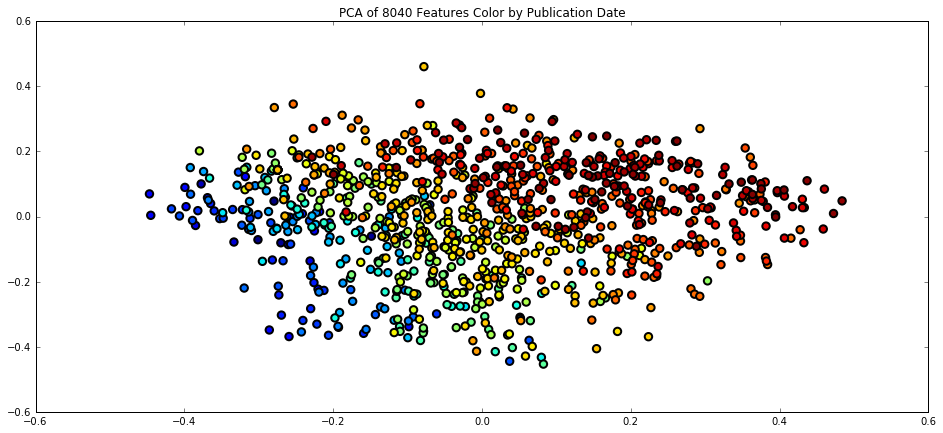

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

lw = 2

fig = plt.figure(figsize=(16,7))

plt.scatter(_df["x"], _df["y"], c=_df["dates"], s=55, lw=lw)

plt.title('PCA of 8040 Features Color by Publication Date')
fig.savefig("viz/PCA_8040_by_year.png")
plt.show()
